In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

# データ取得（タイタニック）
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df_x = df[['sex','pclass','fare']]
df_y = df['survived']
df_x = pd.get_dummies(df_x, drop_first=True)
df_x.head()

,pclass,fare,sex_male
0,3,7.2500,1
1,1,71.2833,0
2,3,7.9250,0
3,1,53.1000,0
4,3,8.0500,1


In [39]:
# 学習データ（train）、テストデータ（test）に分ける
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,random_state=1)

In [40]:
# 決定木で学習させ、テスト
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
model.fit(train_x, train_y)
model.predict(test_x)
model.score(test_x,test_y)

0.7533632286995515

[Text(167.4, 181.2, 'sex_male <= 0.5\ngini = 0.466\nsamples = 668\nvalue = [421, 247]\nclass = y[0]'),
 Text(83.7, 108.72, 'pclass <= 2.5\ngini = 0.398\nsamples = 233\nvalue = [64, 169]\nclass = y[1]'),
 Text(41.85, 36.23999999999998, 'gini = 0.105\nsamples = 126\nvalue = [7, 119]\nclass = y[1]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.498\nsamples = 107\nvalue = [57, 50]\nclass = y[0]'),
 Text(251.10000000000002, 108.72, 'fare <= 26.269\ngini = 0.294\nsamples = 435\nvalue = [357, 78]\nclass = y[0]'),
 Text(209.25, 36.23999999999998, 'gini = 0.223\nsamples = 320\nvalue = [279, 41]\nclass = y[0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.436\nsamples = 115\nvalue = [78, 37]\nclass = y[0]')]

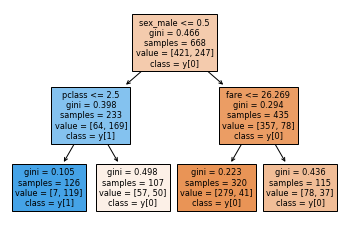

In [41]:
# 決定木可視化
from sklearn.tree import plot_tree
plot_tree(model, feature_names=train_x.columns, class_names=True, filled=True)